# Uebung 4 Mehrklassenklassifikation mit Neuronalen Netzen
Beispielsweise Vorgehnsweise fuer zwei Klassen: Klasse '0' und Klasse '39'

## Imports

In [1]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

## Globale Variablen
Um hartcodierte Bezeichner/Namen in den Funktionen zu vermeiden, definiere an dieser Stelle alle Variablen, die global verwendet werden.

In [2]:
# Pfade zu bildern im jpg-Format

# Pfad zu einem Ordner mit zwei Unterordnern: "0" und "39": die Ordnernamen entsprechen ClassIds
# TO DO: Pfade entsprechend anpassen
PATH_TO_TRAIN_DATA = 'path_to_folder\im_0_39'
PATH_TO_TEST_DATA = '.path_to_folder\Images'
PATH_TO_TEST_LABELS = '.path_to_folder\GT-final_test.csv'

# Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
assert os.path.exists(PATH_TO_TRAIN_DATA), "Der PATH_TO_TRAIN_DATA-Pfad existriert nicht."
assert os.path.exists(PATH_TO_TEST_DATA), "Der PATH_TO_TEST_DATA-Pfad existriert nicht."
assert os.path.exists(PATH_TO_TEST_LABELS), "Der PATH_TO_TEST_LABELS-Pfad existriert nicht."

In [3]:
NUM_CLASSES = 2

In [4]:
SAVE_DIR = os.path.join(os.getcwd(), 'saved_models')
MODEL_NAME = 'tr_sign_model_0_39.h5'

In [5]:
FILEPATH = os.path.join(SAVE_DIR, MODEL_NAME)

## Datenaufbereitung
### Training und Validation Daten
Zur optimalen Nutzung des Arbeitsspeichers deines Rechners kannst du zum Laden von Daten die Funktion [image_dataset_from_directory](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)  nutzen. Diese Funktion unterstuetzt jedoch nicht den ppm-Format. Daher ist fuer die Verwendung dieser Funktion die Ueberfuehrung der Daten in eins der unterstuetzten Formate ( jpeg, png, bmp, gif) notwendig.

**HINWEIS**: In der TensorFlow-Version 2.1.0 und neuer ist die Funktion image_dataset_from_directory noch nicht vorhanden. Die TensorFlow-Version kann im Anaconda-Navigator gecheckt werden.

Alternative [Moeglichkeiten](https://keras.io/api/preprocessing/image/): 

- ImageDataGenerator + flow_from_directory()
- ImageDataGenerator + flow_from_dataframe()
- load_img()
- img_to_array()

In [6]:
# target_size=(64, 64) fuer alle Bilder (optional) 
data_gen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
train_data = data_gen_train.flow_from_directory(PATH_TO_TRAIN_DATA, target_size=(64, 64), 
                                                classes=['0', '39'], seed=1,
                                                batch_size=64, subset='training')
valid_data = data_gen_train.flow_from_directory(PATH_TO_TRAIN_DATA, target_size=(64, 64),
                                                classes=['0', '39'], seed=1,
                                                batch_size=64, subset='validation')

Found 408 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


### Test Daten 

In [8]:
data_gen_test = ImageDataGenerator(rescale=1./255)

In [9]:
pd_test_data = pd.read_csv(PATH_TO_TEST_LABELS, sep=';', dtype=str) 

In [10]:
pd_test_data = pd_test_data[['Filename', 'ClassId']]
# nur zwei Klassen
pd_test_data_0_39 = pd_test_data.loc[pd_test_data['ClassId'].isin(['0', '39'])]

In [11]:
pd_test_data_0_39.head()

,Filename,ClassId
243,00243.ppm,0
252,00252.ppm,0
277,00277.ppm,39
363,00363.ppm,39
403,00403.ppm,0


In [12]:
test_data = data_gen_test.flow_from_dataframe(pd_test_data_0_39, directory=PATH_TO_TEST_DATA, 
                                              x_col='Filename',y_col='ClassId',
                                              classes=['0', '39'], seed=1,
                                              target_size=(64, 64), shuffle=False)

Found 150 validated image filenames belonging to 2 classes.


## Aufbau des Modells
Zum Aufbau deines Modells kannst du dich an die Modellarchitektur des [CIFAR-10 ConvNets](https://keras.io/examples/cifar10_cnn/) richten. 

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES))
model.add(layers.Activation('softmax'))

## Kompilieren des Modells
Eine detaillierte Beschreibung der [compile](https://keras.io/api/models/model_training_apis/#compile-method)-Methode findest du in Keras API Referenz.

In [14]:
# Kompiliere das Modell
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## Training des Modells
Eine detaillierte Beschreibung der [fit](https://keras.io/api/models/model_training_apis/#fit-method)-Methode findest du in Keras API Referenz.

In [15]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)
# Die Warnung kannst du ignorieren.

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/5
7/7 [==============================] - 60s 9s/step - loss: 0.6649 - accuracy: 0.7328 - val_loss: 0.3472 - val_accuracy: 0.9804
Epoch 2/5
7/7 [==============================] - 45s 6s/step - loss: 0.0843 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 38s 5s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.2587e-07 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 37s 5s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.8136e-08 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 42s 6s/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0024 - val_accuracy: 1.0000


In [16]:
history.history

{'loss': [0.6844388895175036,
  0.07752976844123766,
  0.002722420224659693,
  0.002286339222622451,
  0.03629595532513398],
 'accuracy': [0.73284316, 1.0, 1.0, 1.0, 0.99019605],
 'val_loss': [0.347248375415802,
  0.002423337777145207,
  2.2587000714224814e-07,
  2.813573818372106e-08,
  0.0024444700102321804],
 'val_accuracy': [0.98039216, 1.0, 1.0, 1.0, 1.0]}

## Evaluation des Modells
Eine detaillierte Beschreibung der [evaluate](https://keras.io/api/models/model_training_apis/#evaluate-method)-Methode findest du in Keras API Referenz.

Nach der Anwendung der *evaluate*-Methode kannst du dir zusätzlich den ausfuehrlichen Klassifikationsbericht (*classification_report()*) sowie die Konfusionsmatrix (*confusion_matrix()*) anschauen.  

In [17]:
results = model.evaluate(test_data)
# Die Warnung kannst du ignorieren.

  ...
    to  
  ['...']
5/5 [==============================] - 4s 754ms/step - loss: 3.9670e-05 - accuracy: 1.0000


In [18]:
print(results)

[3.966986755585822e-05, 1.0]


## Speichern des trainierten Modells
Zum Speichern des trainierten Modells kann *save*-Methode
Weiterfuehrende Informationen zu dieser Methode unter folgendem [Link](https://keras.io/api/models/model_saving_apis/) zu finden. 

In [19]:
# Speichere das trainierte Modell, um dessen Wiederverwendung zu ermoeglichen
model.save(FILEPATH)

## Nutzen des trainierten Modells zum Vorhersagen von Verkehrszeichen-Klassen 
Zum Wiederverwenden des trainierten gespeicherten Modells kann die [load_model](https://keras.io/api/models/model_saving_apis/#loadmodel-function)-Funktion verwendet werden.

Eine detaillierte Beschreibung der [predict](https://keras.io/api/models/model_training_apis/#predict-method)-Methode findest du in Keras API Referenz. Diese Methodeist nur fuer Sequential-Modelle verfuegbar.

An dieser Stelle werden die gleichen Bilder verwendet, die fuer die Evaluation des Modells verwendet wurden.

In [20]:
# Lade das trainierte Modell und teste die Erkennung der Verkehrszeichen-Klassen mit eigenen Beispielen
saved_model = models.load_model(FILEPATH)

In [21]:
def load_test_data():
    '''
    laedt Testbilder in Numpy Array
    '''
    img_data_list = []
    pd_test_data = pd.read_csv(PATH_TO_TEST_LABELS, sep=';', dtype=str)
    pd_test_data = pd_test_data[['Filename', 'ClassId']]
    
    # Zwei Klassen
    pd_test_data_0_39 = pd_test_data.loc[pd_test_data['ClassId'].isin(['0', '39'])]
    y_true = np.array(list(pd_test_data_0_39['ClassId']))
    
    # filenames_list
    filenames_list = list(pd_test_data_0_39['Filename'])
    for filename in filenames_list:
        filepath = os.path.join(PATH_TO_TEST_DATA, filename)
        assert os.path.exists(filepath), "Der filepath existriert nicht."
        
        img = load_img(filepath, target_size=(64,64))
        input_arr = img_to_array(img)
        img_data_list.append(input_arr)
    input_arr = np.array(img_data_list)
    
    # rescale-Operation
    img_data = input_arr.astype(np.float32)*1./255
    return y_true, img_data

In [22]:
# ClassIds im y_test-Array sind als Strings abgelegt: '0' und '39'
y_test, x_test = load_test_data()

In [23]:
# ClassIds im y_test-Array sind als Integers abgelegt: 0 und 1
predicted_classes = saved_model.predict_classes(x_test)

In [24]:
# Mapping der ClassIds
predicted_classes[predicted_classes == 1] = 39

In [25]:
# Evaluiere das trainierte Modell mit den Testdaten
print(classification_report(y_true=y_test, y_pred=predicted_classes.astype(str), target_names=['0', '39']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
          39       1.00      1.00      1.00        90

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [27]:
# confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=predicted_classes.astype(str))

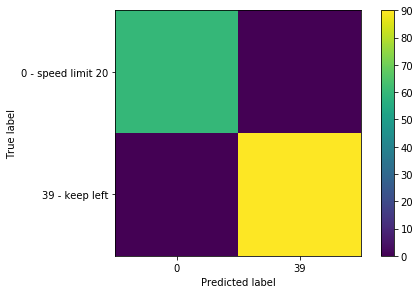

In [31]:
def plot_confusion_matrix(conf_matr, labels):
    
    plt.figure(figsize=(6,4))   
    plt.imshow(conf_matr, interpolation='nearest')
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(NUM_CLASSES)
    plt.xticks(tick_marks, ['0', '39'])
    plt.yticks(tick_marks, tuple(labels))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_confusion_matrix(cm, ['0 - speed limit 20', '39 - keep left'])

In [ ]:
# TO DO: 
# Modell fuer alle Klassen erweitern. Zur Optimierung der Ergebnisse andere Optimierer ausprobieren,
# Modellarchitektur variieren ...
# Optional: Google Colab einrichten und zum Training nutzen